Outlier detection for Closing price of Tesla stock

In [40]:
import yfinance as yf
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [79]:
# Fetching Tesla stock data from Yahoo Finance

tesla_data = yf.download('TSLA', start='2022-01-01', end='2024-01-01')
tesla_data.shape

[*********************100%%**********************]  1 of 1 completed


(501, 6)

In [80]:
tesla_data_close=tesla_data[['Close']]
tesla_data_close.head(5)
tesla_data_close.shape

(501, 1)

In [10]:
tesla_data_close.isnull().any()

Close    False
dtype: bool

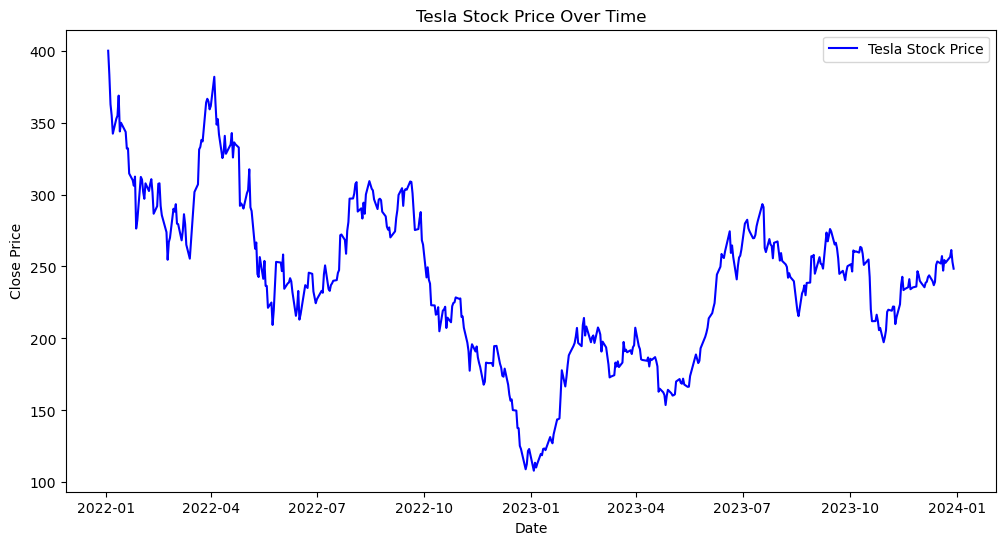

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0b1fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0c3550>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0b1d30>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0c3a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0c3d30>],
 'means': []}

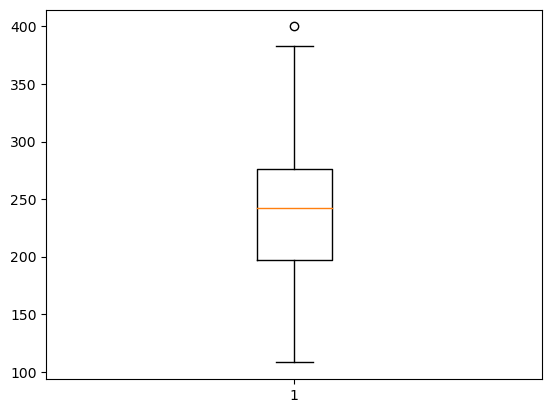

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_data.index, tesla_data['Close'], label='Tesla Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price Over Time')
plt.legend()
plt.show()
plt.boxplot(tesla_data_close['Close'])

In [86]:
q1=tesla_data_close.quantile(0.25)
q3=tesla_data_close.quantile(0.75)
IQR = q3-q1
threshold = 1.5*IQR
num_outliers = ((tesla_data_close < (q1 - threshold)) | (tesla_data_close > (q3 - threshold)) ).sum()
print(num_outliers)

Close    472
dtype: int64


In [66]:
model=IsolationForest(n_estimators=100,contamination=float(0.01),random_state=42)
model.fit(tesla_data_close)


IsolationForest(contamination=0.01, random_state=42)

In [67]:
tesla_data_close['outliers']=model.predict(tesla_data_close)

/var/folders/51/k8gtjxbx76n4cr198yp8k8gr0000gn/T/ipykernel_31521/3953745909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data_close['outliers']=model.predict(tesla_data_close)


In [68]:
tesla_data_close.head(10)

,Close,outliers
Date,,
2022-01-03,399.926666,-1
2022-01-04,383.196655,-1
2022-01-05,362.706665,1
2022-01-06,354.899994,1
2022-01-07,342.320007,1
2022-01-10,352.706665,1
2022-01-11,354.799988,1
2022-01-12,368.739990,1
2022-01-13,343.853333,1


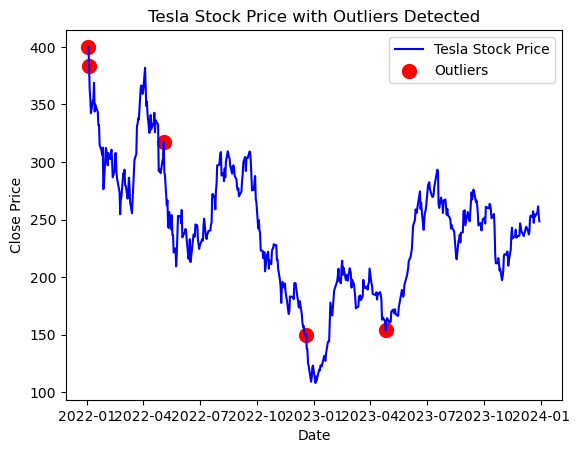

In [69]:
plt.plot(tesla_data_close.index, tesla_data_close['Close'], label='Tesla Stock Price', color='blue')
plt.scatter(tesla_data_close.index[tesla_data_close['outliers'] == -1], tesla_data_close['Close'][tesla_data_close['outliers'] == -1], 
            label='Outliers', color='red', s=100, marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price with Outliers Detected')
plt.legend()
plt.show()

outlier detection for volume of tesla data 

In [44]:
tesla_data_volume=tesla_data[['Volume']]
tesla_data_volume.head(5)

,Volume
Date,
2022-01-03,103931400
2022-01-04,100248300
2022-01-05,80119800
2022-01-06,90336600
2022-01-07,84164700


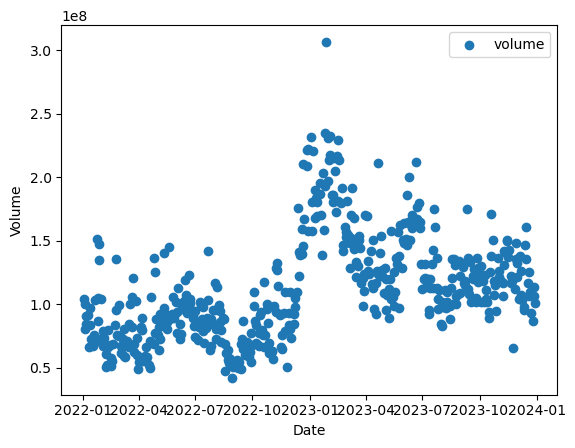

In [53]:
plt.scatter(tesla_data_volume.index, tesla_data_volume, label='volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x28f190910>,
 'caps': [<matplotlib.lines.Line2D at 0x28f190e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0e2fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x28f195400>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f1956a0>],
 'means': []}

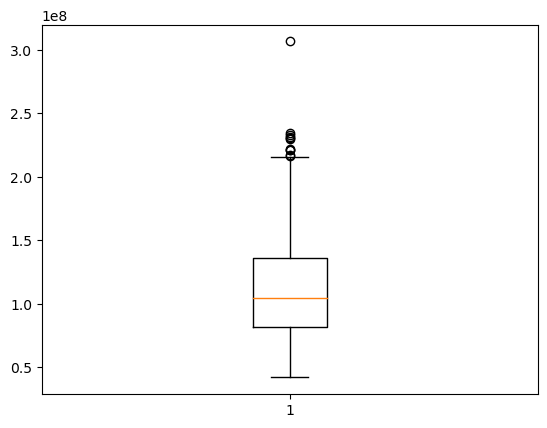

In [81]:
plt.boxplot(tesla_data_volume)

In [83]:
q1_data=tesla_data_volume.quantile(0.25)
q3_data=tesla_data_volume.quantile(0.75)
IQR_data = q3_data-q1_data
threshold_volume = 1.5*IQR_data
num_outliers_volume = ((tesla_data_volume < (q1_data - threshold_volume)) | (tesla_data_volume > (q3_data - threshold_volume)) ).sum()
print(num_outliers_volume)

Volume    480
dtype: int64


In [88]:
model_2 = IsolationForest(n_estimators=100, contamination=0.05)
model_2.fit(tesla_data_volume)


IsolationForest(contamination=0.05)

In [90]:
tesla_data_volume['outliers'] =  model_2.predict(tesla_data_volume)

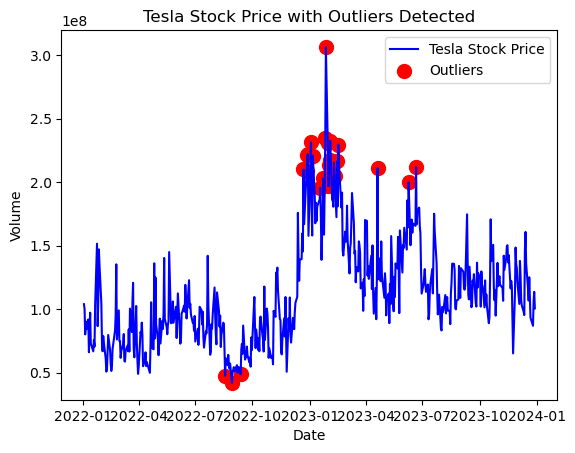

In [93]:
plt.plot(tesla_data_volume.index, tesla_data_volume['Volume'], label='Tesla Stock Price', color='blue')
plt.scatter(tesla_data_volume.index[tesla_data_volume['outliers'] == -1], tesla_data_volume['Volume'][tesla_data_volume['outliers'] == -1], 
            label='Outliers', color='red', s=100, marker='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Tesla Stock Price with Outliers Detected')
plt.legend()
plt.show()